<div>
<h1 align="center">Election project</h1>
<h2 align="center"> By: Hans Michael Célestin </h2>
<br>

</div>

In [6]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import scipy.stats as pearsonr
from pandas_datareader import data, wb, DataReader
import numpy as np
from datetime import datetime



In [7]:
import requests # grab info from web
from io import StringIO

In [8]:
url = "http://elections.huffingtonpost.com/pollster/api/charts/2012-general-election-romney-vs-obama.csv"

source =requests.get(url).text
poll_data =StringIO(source) # avoid string io error

In [9]:
poll_df = pd.read_csv(poll_data)

In [10]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Obama                 428 non-null    float64
 1   Romney                428 non-null    float64
 2   Undecided             276 non-null    float64
 3   Other                 137 non-null    float64
 4   poll_id               428 non-null    int64  
 5   pollster              428 non-null    object 
 6   start_date            428 non-null    object 
 7   end_date              428 non-null    object 
 8   sample_subpopulation  428 non-null    object 
 9   sample_size           414 non-null    float64
 10  mode                  428 non-null    object 
 11  partisanship          428 non-null    object 
 12  partisan_affiliation  428 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 43.6+ KB


In [11]:
poll_df.head()

,Obama,Romney,Undecided,Other,poll_id,pollster,start_date,end_date,sample_subpopulation,sample_size,mode,partisanship,partisan_affiliation
0,47.0,47.0,6.0,NaN,16674,Politico/GWU/Battleground,2012-11-04,2012-11-05,Likely Voters,1000.0,Live Phone,Nonpartisan,None
1,49.0,47.0,3.0,NaN,16733,YouGov/Economist,2012-11-03,2012-11-05,Likely Voters,740.0,Internet,Nonpartisan,None
2,48.0,48.0,4.0,NaN,16681,Gravis Marketing,2012-11-03,2012-11-05,Likely Voters,872.0,Automated Phone,Nonpartisan,None
3,50.0,49.0,NaN,1.0,16679,IBD/TIPP,2012-11-03,2012-11-05,Likely Voters,712.0,Live Phone,Nonpartisan,None
4,48.0,49.0,NaN,NaN,16677,Rasmussen,2012-11-03,2012-11-05,Likely Voters,1500.0,Automated Phone,Nonpartisan,None


C:\Users\hansm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='partisan_affiliation', ylabel='count'>

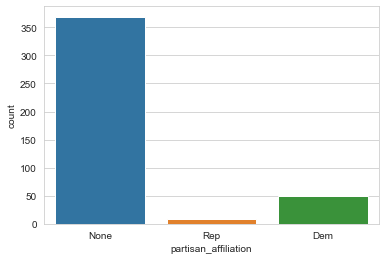

In [12]:
sns.countplot('partisan_affiliation',data=poll_df)


C:\Users\hansm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='partisan_affiliation', ylabel='count'>

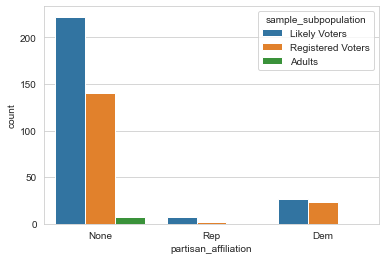

In [15]:
sns.countplot('partisan_affiliation',data=poll_df,hue='sample_subpopulation')

In [17]:
poll_df.head()

,Obama,Romney,Undecided,Other,poll_id,pollster,start_date,end_date,sample_subpopulation,sample_size,mode,partisanship,partisan_affiliation
0,47.0,47.0,6.0,NaN,16674,Politico/GWU/Battleground,2012-11-04,2012-11-05,Likely Voters,1000.0,Live Phone,Nonpartisan,None
1,49.0,47.0,3.0,NaN,16733,YouGov/Economist,2012-11-03,2012-11-05,Likely Voters,740.0,Internet,Nonpartisan,None
2,48.0,48.0,4.0,NaN,16681,Gravis Marketing,2012-11-03,2012-11-05,Likely Voters,872.0,Automated Phone,Nonpartisan,None
3,50.0,49.0,NaN,1.0,16679,IBD/TIPP,2012-11-03,2012-11-05,Likely Voters,712.0,Live Phone,Nonpartisan,None
4,48.0,49.0,NaN,NaN,16677,Rasmussen,2012-11-03,2012-11-05,Likely Voters,1500.0,Automated Phone,Nonpartisan,None


In [26]:
avg =pd.DataFrame(poll_df.mean())
avg.drop(['poll_id','sample_size'],axis =0 ,inplace=True)

In [29]:
avg.head()

,0
Obama,47.161215
Romney,45.228972
Undecided,5.615942
Other,2.686131


In [37]:
std =pd.DataFrame(poll_df.std())
std.drop(['poll_id','sample_size'],axis =0 ,inplace=True)

In [39]:
std.head()

,0
Obama,2.100449
Romney,2.370565
Undecided,2.629407
Other,1.612232


<AxesSubplot:>

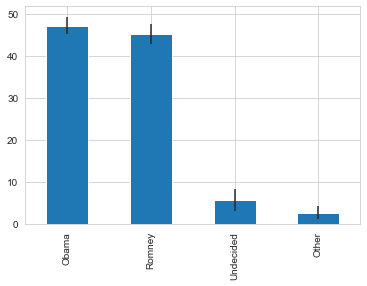

In [41]:
avg.plot(yerr=std,kind='bar',legend=False)

In [45]:
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns= ['Avarage','STD']
poll_avg

,Avarage,STD
Obama,47.161215,2.100449
Romney,45.228972,2.370565
Undecided,5.615942,2.629407
Other,2.686131,1.612232
